In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fftfreq 

11.458226287123626


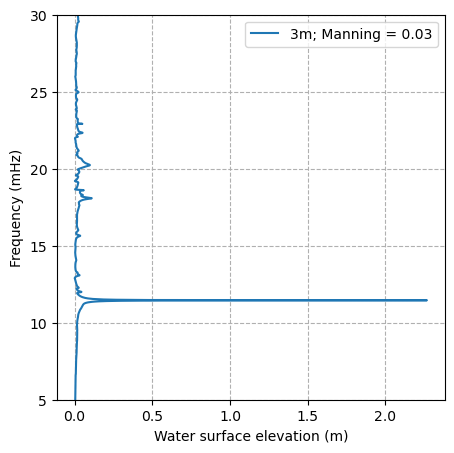

In [2]:
# Read in time series
df = pd.read_csv("../../seiche/Gauge0-Manning0-0x3-dx=3-18hrs.txt",
                 header=None, names=["t", "a"], delim_whitespace=True)
fs = 1  # Resample to 1 s

# Do the resampling
df = df.set_index(pd.to_datetime(df['t'], unit='s'), drop=False)
resample_index = pd.date_range(start=df.index[0], end=df.index[-1], freq=f'{fs}s')
dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=df.columns)
df_interp = df.combine_first(dummy_frame).interpolate('time').resample(f'{fs}s').fillna("pad")

# Now do the discrete fourier transform
fft_result2 = np.fft.rfft(df_interp["a"].values)
fft_freq2_mann = np.fft.rfftfreq(len(df_interp["a"]), fs)
fft_result_pos2_mann = 2.0 / len(df_interp["a"]) * np.abs(fft_result2)
dominant_freq2 = fft_freq2_mann[np.argmax(fft_result_pos2_mann)]
print(dominant_freq2*1000)

# Plot the amplitude spectrum
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot()
ax.plot(fft_result_pos2_mann, fft_freq2_mann*1000, label="3m; Manning = 0.03")
ax.legend()
ax.set_ylim([5, 30])
ax.grid(ls="--")
ax.set_xlabel("Water surface elevation (m)")
ax.set_ylabel("Frequency (mHz)")
plt.savefig("Figure5E.png", bbox_inches="tight", dpi=300)